In [11]:

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading my data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#using the apply method with lambda to get data if not nall values 

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [20]:
#setting our job_title_short column to Data Analyst
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [21]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)


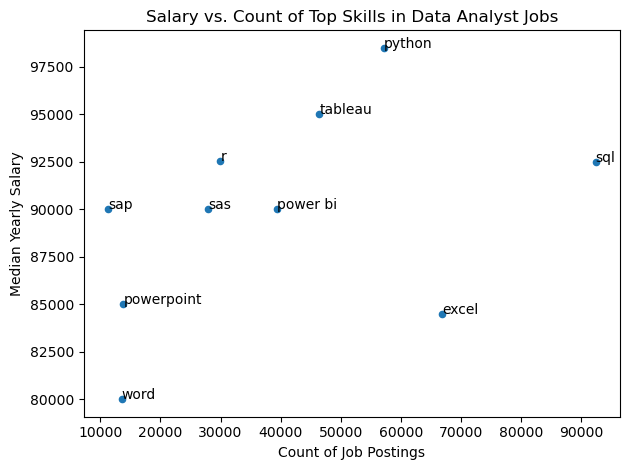

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary') #creating are scatter plot for the sleected columns for x and y

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) #labling each point

plt.xlabel('Count of Job Postings') #xlabel
plt.ylabel('Median Yearly Salary') #ylabel
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs') #title
plt.tight_layout() #put values in the right shape using the tight_layout method
plt.show()
